#**Machine Learning Lab Practice: LINEAR REGRESSION**
### **2020년10월14일 (수) 19:00 KST**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df=pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### **Simple Linear Regression Model**

In [ ]:
#Importing Linear Regression Module from Sci-Kit Learn
from sklearn.linear_model import LinearRegression

In [ ]:
#Calling the class LinearRegression
reg=LinearRegression()

In [ ]:
#Define the X for the input and Y for the target variable for the Linear Regression
x=df['lstat']
y=df['medv']

In [ ]:
#Before fitting the data to the LinearRegression, we need to change the X and Y to
#NUMPY ARRAY instead of DataFrame
x=np.array(x)
y=np.array(y)

In [ ]:
#Reshaping the X
x=x.reshape(-1,1)

In [ ]:
#Checking the reshaped X -- From (506,) to (506,1)
x.shape

(506, 1)

In [ ]:
#Fitting the X and Y to LinearRegression
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The Coefficient of the Linear Relation between X and Y is:",reg.coef_)
print("The Intercept of X and Y in the Linear Regression is:", reg.intercept_)

The Coefficient of the Linear Relation between X and Y is: [-0.95004935]
The Intercept of X and Y in the Linear Regression is: 34.5538408793831


From the result above, the equation of our linear model is:

$y = -0.95004935 + 34.553840879831*X$

###**Making the Prediction using the Linear Model**

In [ ]:
#Create the test variable to test our model
test=np.array(range(10))
#Then reshape it
test=test.reshape(-1,1)
test

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
#Calculating predicted Y (yhat) using the reg.predict()
yhat=reg.predict(x)

###**Visualize the Linear Relation between X (lstat) and Y (medv)**

In [ ]:
#Import the library for visualization
import matplotlib.pyplot as plt

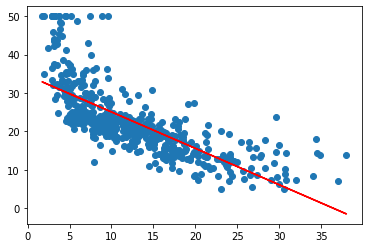

In [ ]:
#Plotting the data
plt.figure(facecolor='white')
plt.scatter(x,y)
plt.plot(x,yhat,c='r')

In [ ]:
#Calculating the RMSE
rmse=np.sqrt(np.sum((yhat-y)**2)/len(y))
rmse

6.20346413142642

In [ ]:
#Calculating the MSE and R2 Score using SKLearn
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("The Mean Squred Error of the Y and Yhat is:", mean_squared_error(y,yhat))

The Mean Squred Error of the Y and Yhat is: 38.48296722989415


In [ ]:
print("The R2 Score of the Y and Yhat is:", r2_score(y,yhat))

The R2 Score of the Y and Yhat is: 0.5441462975864797


##**Multiple Linear Regression**

In [ ]:
#Here, we will have x with more than 1 feature
x=df[['lstat','age']]
y=df['medv']

In [ ]:
#Re-write the model we use (just for convenience)
reg=LinearRegression()

In [ ]:
#In multiple linear regression, we don't need to reshape the x
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The Coefficient of the Linear Relation between X and Y is:",reg.coef_)
print("The Intercept of X and Y in the Linear Regression is:", reg.intercept_)

The Coefficient of the Linear Relation between X and Y is: [-1.03206856  0.03454434]
The Intercept of X and Y in the Linear Regression is: 33.2227605317929


In [ ]:
#Predicts the yhat
yhat=reg.predict(x)

In [ ]:
#MSE
print("The Mean Squred Error of the Y and Yhat is:", mean_squared_error(y,yhat))

The Mean Squred Error of the Y and Yhat is: 37.88167709241267


In [ ]:
#R2 Score
print("The R2 Score of the Y and Yhat is:", r2_score(y,yhat))

The R2 Score of the Y and Yhat is: 0.5512689379421003


###**Statistical Test on Regression Coefficient**

In [ ]:
#Statsmodel provides the way to calculate statistics elements
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x=sm.add_constant(x)
reg=sm.OLS(y,x)
result=reg.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.98e-88
Time:                        05:45:53   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.0

In [ ]:
#Recall the dataframe
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#Obtaining multiplication results of two columns' value
lstat_age=df['lstat']*df['age']
lstat_age

0      324.696
1      721.146
2      246.233
3      134.652
4      288.886
        ...   
501    668.197
502    696.436
503    513.240
504    578.664
505    636.704
Length: 506, dtype: float64